## Linear Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Final model submit function

Принимает на вход путь к набору данных в формате `.csv`

На выходе получается файл с предиктами в формате `.csv`

Пример содержания:
```
0.432
0.412
0.312
```

Реализация модели - между ними

In [2]:
data = pd.read_csv("train.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             8000 non-null   int64  
 1   category               8000 non-null   object 
 2   clicks                 7727 non-null   float64
 3   likes                  7624 non-null   float64
 4   buys                   8000 non-null   int64  
 5   4xx_errors             8000 non-null   int64  
 6   5xx_errors             8000 non-null   int64  
 7   complaints_count       7527 non-null   object 
 8   average_dwelltime      8000 non-null   float64
 9   source_attractiveness  8000 non-null   float64
 10  date_of_registration   8000 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 687.6+ KB


,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
0,6622,ecom,6488536.0,NaN,0,82221,0,0,18.450527,0.461750,2020-04-21 16:04:41.817367072
1,2047,information_source,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,2024-07-19 23:50:07.268931816
2,1118,information_source,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,2024-07-13 16:35:54.794883135
3,4992,news,89534.0,924.0,0,834,0,0,2.149243,-0.093360,2024-09-10 21:29:14.006315095
4,9970,information_source,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303,2024-05-26 11:07:15.950527838


In [3]:


def prepare(data):

    new_data = data.drop(data.columns[0], axis=1)
    new_data['likes'] = new_data['likes'].fillna(new_data['likes'].mean())
    new_data['buys'] = new_data['buys'].fillna(new_data['buys'].mean())
    new_data['clicks'] = new_data['clicks'].fillna(new_data['clicks'].mean())
    new_data['complaints_count'] = pd.to_numeric(new_data['complaints_count'], errors='coerce')
    new_data['complaints_count'] = new_data['complaints_count'].fillna(new_data['complaints_count'].mean())
    new_data['average_dwelltime'] = new_data['average_dwelltime'].fillna(new_data['average_dwelltime'].mean())
    
    data_encoded = pd.get_dummies(new_data, columns=['category'], drop_first=True)
    
    data_encoded['date_of_registration'] = pd.to_datetime(data_encoded['date_of_registration'], errors='coerce')
    current_date = pd.to_datetime('now')
    data_encoded['days_since_registration'] = (current_date - data_encoded['date_of_registration']).dt.days
    
    # drop high corrlation column
    data_final = data_encoded.drop('date_of_registration', axis=1).drop('complaints_count', axis=1)

    return data_final



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   clicks                       8000 non-null   float64
 1   likes                        8000 non-null   float64
 2   buys                         8000 non-null   int64  
 3   4xx_errors                   8000 non-null   int64  
 4   5xx_errors                   8000 non-null   int64  
 5   average_dwelltime            8000 non-null   float64
 6   source_attractiveness        8000 non-null   float64
 7   category_information_source  8000 non-null   bool   
 8   category_news                8000 non-null   bool   
 9   category_porn                8000 non-null   bool   
 10  category_social              8000 non-null   bool   
 11  days_since_registration      8000 non-null   int64  
dtypes: bool(4), float64(4), int64(4)
memory usage: 531.4 KB


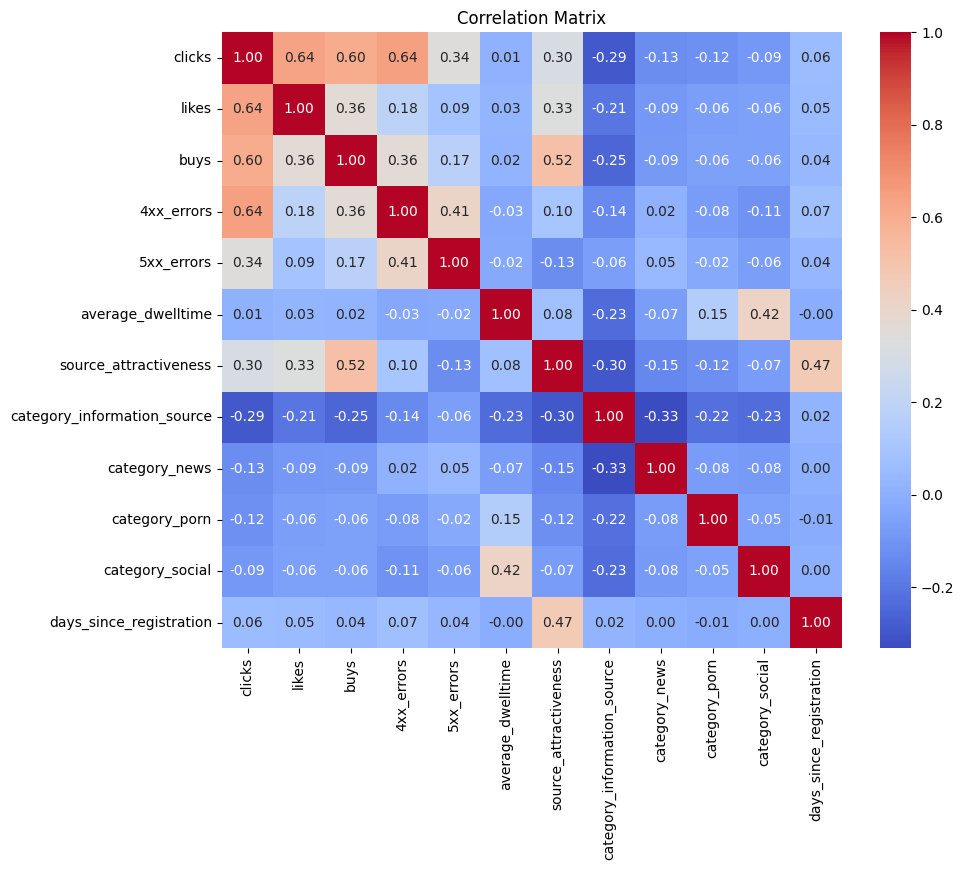

In [4]:
bad_data = pd.read_csv("train.csv")
new_data = prepare(bad_data)
new_data.info()

plt.figure(figsize=(10, 8))
sns.heatmap(new_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [5]:

def train_model(data_path):
    data = pd.read_csv(data_path)
    data_final = prepare(data)
    
    X = data_final.drop('source_attractiveness', axis=1)
    y = data_final['source_attractiveness']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.4f}')
    return model



## Submit

In [6]:
def predict(data_path):
    model = train_model("train.csv")
    data = pd.read_csv(data_path)
    X = prepare(data)
    y = model.predict(X)
    data = {
    "source_attractiveness": y
    }
    submit = pd.DataFrame(data)
    submit.to_csv('submission.csv', index_label="ID")


predict("test.csv")

Mean Squared Error: 0.0171
